# **Parte 1: Compresión de imágenes con Kmeans**


## **Leer la imagen**

Imagen Original


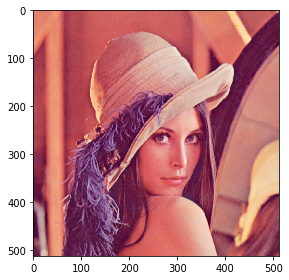

In [ ]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

#Lee la imagen
image = io.imread('lena.png') #recuerda cargar la imagen a su notebook en google colab.
print('Imagen Original')
io.imshow(image)
io.show()

#Dimensiones de la imagen original
rows = image.shape[0]
cols = image.shape[1]

#Transforma en matriz de Nx3 (N pixeles, 3 características R, G, B)
image = image.reshape(rows*cols, 3)

#Matriz Nx3
#pixel 1: R, G, B
#pixel 2: R, G, B
#...
#pixen N: R, G, B

## **Implementar k-means**

In [ ]:
#Implementa k-means clustering para k clusters
print('Calculando k-means')
k = 4 # número de colores
kmeans = KMeans(n_clusters=k) #con n_clusters = 128 puede demorar unos 5 minutos en ejecutar., n_clusters es el num. de colores.
kmeans.fit(image)

Calculando k-means


KMeans(n_clusters=4)

## **Comprimir imagen**

In [ ]:
#Compresión: Reemplaza cada pixel  con su centroide más cercano
print('Comprimiendo la imagen')
compressed_image = kmeans.cluster_centers_[kmeans.labels_] #cluster_centers_ son las coord. de los centroides
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Regresamos a la dimensión original filasxcolumnas*3
compressed_image = compressed_image.reshape(rows, cols, 3)



Comprimiendo la imagen


## **Mostrar Imagen comprimida**

Imagen comprimida


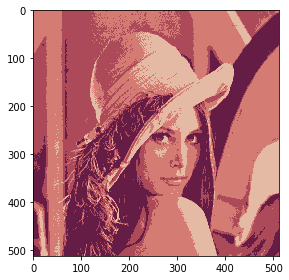

In [ ]:
#Guardamos y mostramos la imagen comprimida
print('Imagen comprimida')
io.imsave('compressed_image_8.png', compressed_image)
io.imshow(compressed_image)
io.show()

## Actividad

Grafique la distorsión (heterogeneidad) en función del número de clusters k. Utilice los siguientes valores para k: 1, 2, 4, 8, 16, 32, 64, 128. Comente sus resultados. A partir de qué valor de k para usted es imperceptible la diferencia entre la imagen original y la comprimida?

Tip: Consulte la ayuda de kmeans para entender donde almacena la distorsión el objeto kmeans https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html . Recuerde que la distorsión no es nada más que la suma de las distancias al cuadrado entre las muestras y su cluster más cercano. 


Text(0, 0.5, 'Distortion')

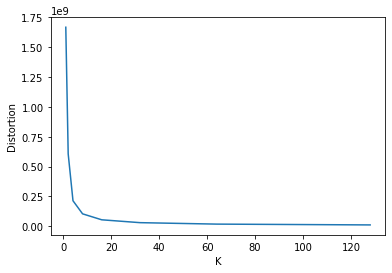

In [ ]:
k=[1, 2, 4, 8, 16, 32, 64, 128]
distortion=[]

for i in k:
  kmeans = KMeans(n_clusters=i) #con n_clusters = 128 puede demorar unos 5 minutos en ejecutar., n_clusters es el num. de colores.
  kmeans.fit(image)
  distortion.append(kmeans.inertia_)
plt.plot(k,distortion)
plt.xlabel('K')
plt.ylabel('Distortion')

Comprimiendo la imagen
Imagen comprimida


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: compressed_image_8.png is a low contrast image
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


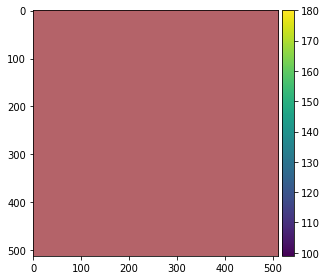

Comprimiendo la imagen
Imagen comprimida


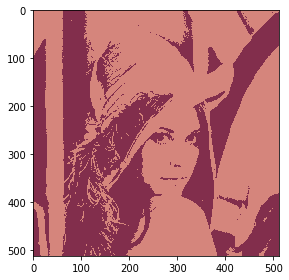

Comprimiendo la imagen
Imagen comprimida


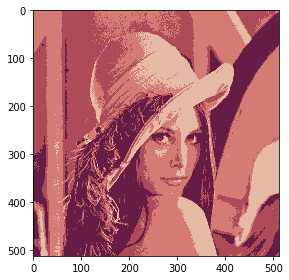

Comprimiendo la imagen
Imagen comprimida


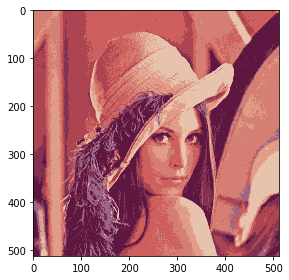

Comprimiendo la imagen
Imagen comprimida


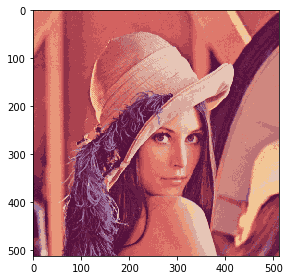

Comprimiendo la imagen
Imagen comprimida


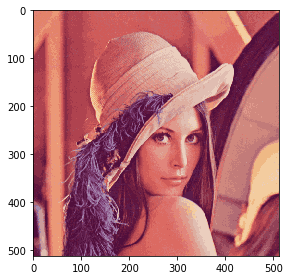

Comprimiendo la imagen
Imagen comprimida


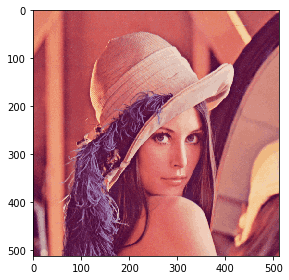

Comprimiendo la imagen
Imagen comprimida


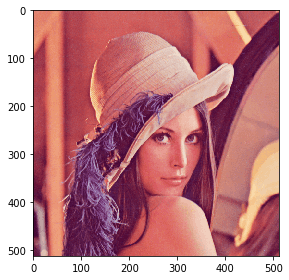

In [ ]:
k=[1, 2, 4, 8, 16, 32, 64, 128]


for i in k:
  kmeans = KMeans(n_clusters=i) #con n_clusters = 128 puede demorar unos 5 minutos en ejecutar., n_clusters es el num. de colores.
  kmeans.fit(image)
  #Compresión: Reemplaza cada pixel  con su centroide más cercano
  print('Comprimiendo la imagen')
  compressed_image = kmeans.cluster_centers_[kmeans.labels_] #cluster_centers_ son las coord. de los centroides
  compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

  #Regresamos a la dimensión original filasxcolumnas*3
  compressed_image = compressed_image.reshape(rows, cols, 3)
  print('Imagen comprimida')
  io.imsave('compressed_image_8.png', compressed_image)
  io.imshow(compressed_image)
  io.show()
  


# **Parte 2: Clustering de vinos**

En la siguiente actividad se implementará un ejemplo de aprendizaje no supervisado utilizando k-means (Clustering).

Se tiene que agrupar vinos con caracteristicas similares para esto se debe cargar el archivo caractersiticas de vinos. La base de datos tiene 178 vinos y sus características como alcohol, alcalinidad, entre otras.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
vinos=pd.read_csv('caracteristicas_de_vinos.csv',engine='python') #cargue el archivo csv a su google colab
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Se elimina la primera columna pues esta es solo un índice

In [ ]:
vinos_variables=vinos.drop(['Vino'],axis=1)
# se describe su media, desviación estandar minimo máximo de cada una de las características 
vinos_variables.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


A continuación, normalizamos los datos para que sus variables tengan media cero y varianza unitaria. La función `StandardScaler` es la que nos permite realizar esta normalización

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #normalizaciòn media cero, varianza 1.
scaler.fit(vinos_variables)
vinos_norm = scaler.transform(vinos_variables)
pd.DataFrame(vinos_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


## Actividad

Determine el número de clusters óptimo utilizando la técnica del codo (elbow´s method). Para esto, ejecute k-means para valores de k=1, 2, ... 11 y guarde la distorsión de cada clusterización. Grafique la distorsión en función de K y aplica el método del codo para determinar el valor óptimo de k (número de clusters).

Tip: Consulte la ayuda de kmeans para entender donde almacena la distorsión el objeto kmeans https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html . Recuerde que la distorsión no es nada más que la suma de las distancias al cuadrado entre las muestras y su cluster más cercano. 



Text(0, 0.5, 'Distortion')

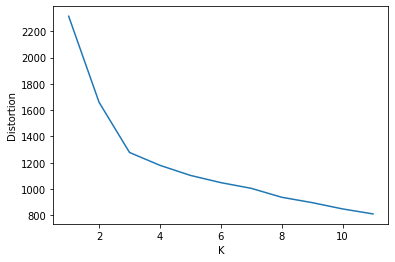

In [ ]:
# INICIO CÓDIGO
#INSERTE AQUÍ EL CÓDIGO SOLICITADO
k=[1,2,3,4,5,6,7,8,9,10,11]
distortion=[]
for i in k:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(vinos_norm)
  distortion.append(kmeans.inertia_)
plt.plot(k,distortion)
plt.xlabel("K")
plt.ylabel("Distortion")
#FIN CÓDIGO

Una vez determinado el número de clusters óptimo de acuerdo al método del codo, vamos a ejecutar de nuevo kmeans con dicho valor. En este apartado, usted solo tiene que asignar el valor de k obtenido del análisis anterior a la variable `nc` del siguiente bloque:

In [ ]:

nc= 3 ##### Coloque aquí el valor de k obtenido con el método del codo del apartado anterior
clustering = KMeans(n_clusters=nc, max_iter=300)
clustering.fit(vinos_norm)
vinos['KMeans_Clusters']=clustering.labels_ #creamos una columna con la etiqueta inferida zi por kmeans
vinos

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


Con el fin de graficar los cluster se utilizará el algortimo PCA para visualizar los datos a graficar 

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_vinos=pca.fit_transform(vinos_norm)
pca_vinos_df = pd.DataFrame(data=pca_vinos, columns =['Componente_1', 'Componente_2'])
pca_nombres_vinos= pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]], axis=1)
pca_nombres_vinos

,Componente_1,Componente_2,KMeans_Clusters
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,0
174,-2.601956,-1.757229,0
175,-2.677839,-2.760899,0
176,-2.387017,-2.297347,0


Una vez realizado PCA se realizará la gráfica de los cluster


<function matplotlib.pyplot.show(*args, **kw)>

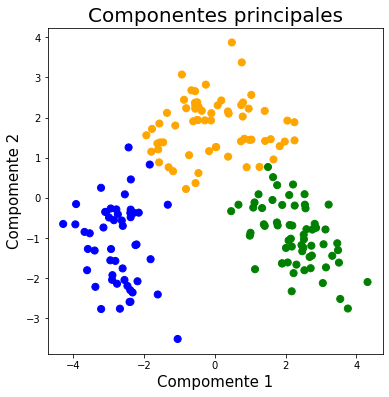

In [ ]:
fig = plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Compomente 1', fontsize=15)
ax.set_ylabel('Compomente 2', fontsize=15)
ax.set_title('Componentes principales', fontsize=20)

color_theme = np.array(['blue', 'green', 'orange', 'black', 'yellow','cyan','magenta','brown','gray','pink'])
ax.scatter(x=pca_nombres_vinos.Componente_1, y = pca_nombres_vinos.Componente_2, c=color_theme[pca_nombres_vinos.KMeans_Clusters], s=50)
plt.show

# **Parte 3: Kmeans++**
Investigue qué es K-means++ y la diferencia con k-means

Los dos dos son metod dde clustering pero la gran diferencia entre los dos es la seleccion del centroide. para kmeans el centroide se define aleatoriamente mientras que en el kmeans++ el centroide es uno de los puntos que forma parte del dataset. 

# **Parte 4: Conclusiones**

Concluya su trabajo de acuerdo a sus observaciones de los experimentos realizados.

A lo largo del laboratorio podemos evidenciar el uso practico de KMeans. 

Este tiene aplicaciones como la compresion de imagenes y clustering. Para imagenes es importante determinar el k optimo para la compresion parqa no perder informacion importante.Adicionalmente podemos ver como la regla del codo nos puede ayudar a optimizar el numero de clusters que necesitamos en un model cuando no tenemos la informacion exacta o un experto que nos indique el numero de clusters.
